<a href="https://colab.research.google.com/drive/1tAgbjrtiVSNS4MmNjzobwZF5Vd1EWMwy?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

Необходимо подготовить отчет для Министерства транспорта, раскрывающий природу и характеристики задержек рейсов. Отчет должен помочь выявить проблемные области и способствовать принятию решений. Поэтому следует избегать изложения общих фактов и стремиться показать проблемы. Например, факт «средняя задержка вылета составляет 15 минут» сам по себе мало что говорит и не помогает понять, почему это происходит. Напротив, график, показывающий, что по понедельникам задержки увеличиваются втрое по сравнению с другими днями на фоне увеличения количества рейсов и пассажиров, указывает на возможную причину проблемы: аэропорты не справляются с неравномерной нагрузкой.

Отчет должен быть выполнен в виде блокнота (notebook) с четкой структурой. В начале ячейки Markdown должно быть краткое описание исследуемого вопроса (что мы будем изучать), затем код и все его выводы (таблицы, графики, значения), а затем снова ячейка Markdown, в которой формулируется ваш краткий вывод.

Отчет должен содержать как минимум 5 результатов, подтвержденных графиками. Для разнообразия материала используйте различные типы диаграмм. Все графики должны быть снабжены необходимыми подписями (обозначения осей, заголовок, легенда цветовой схемы).

Для решения задач используйте методы библиотеки pandas.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ds = pd.read_csv('flights.csv', low_memory=False)


In [4]:
airlines = pd.read_csv('airlines.csv', low_memory=False)

In [5]:
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [6]:
airports = pd.read_csv('airports.csv', low_memory=False)

In [7]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


Сделаем данные более корректными в рамках нашей цели анализа. Уберем частные самолеты, перелеты из частных аэропортов и рейсы, которые отправились раньше, чем должны были по расписанию.

In [8]:
df = ds[ds['DEPARTURE_DELAY'] >= 0]

df = df[df['ORIGIN_AIRPORT'].str.match(r'^[A-Za-z]', na=False)]

df = df[(df['TAIL_NUMBER'].str.match(r'^[A-Za-z]', na=False))]

In [9]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
12,2015,1,1,4,DL,1434,N547US,LAX,MSP,35,...,605.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
20,2015,1,1,4,NK,520,N525NK,LAS,MCI,55,...,543.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,607.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0


###**1.**
Сгруппируем данные по дням недели и проанализируем, в какие дни средняя задержка самолетов больше.

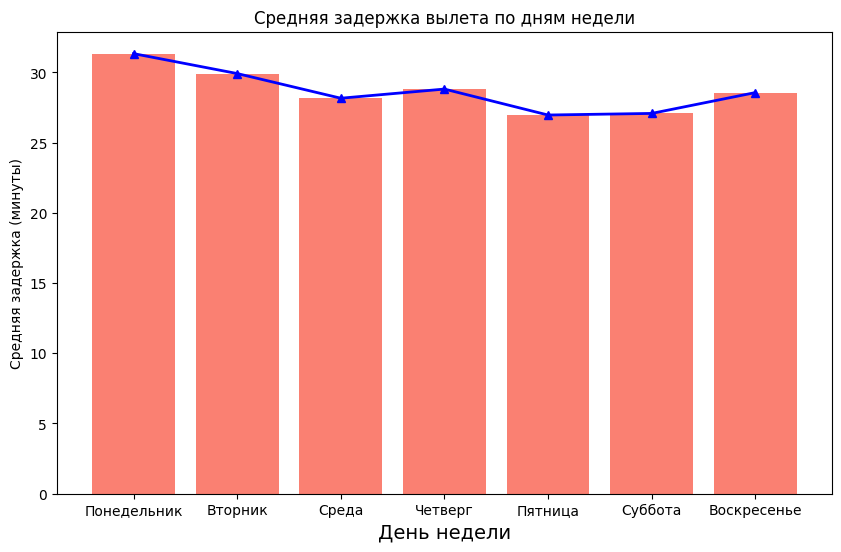

In [10]:
delays_dow = df.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()


dow = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

plt.figure(figsize=(10, 6))
plt.bar(dow, delays_dow.values, color='salmon')
plt.plot(dow, delays_dow.values, marker='^', color='blue', linewidth=2, label='Тренд')
plt.title("Средняя задержка вылета по дням недели")
plt.xlabel("День недели", fontsize=14)
plt.ylabel("Средняя задержка (минуты)")

plt.show()

**Вывод**:
Видим, что наибольшие задержки наблюдаются в начале недели: в понедельник и вторник. К середине недели задержки снижаются, достигая минимума в пятницу. В выходные дни задержки снова увеличиваются, но остаются ниже, чем в начале недели. Это может указывать на повышенную нагрузку на аэропорты и авиакомпании в начале недели, связанную с деловыми рейсами, и более стабильную ситуацию к концу недели. Для снижения задержек стоит уделить внимание оптимизации процессов в понедельник и вторник.

###**2.**


Сгруппируем данные по авиакомпаниям и посмотрим, какие из них чаще задерживают рейсы.

In [11]:
df = df.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')

df = df.rename(columns={'AIRLINE_x': 'AIRLINE_CODE', 'AIRLINE_y': 'AIRLINE_NAME'})

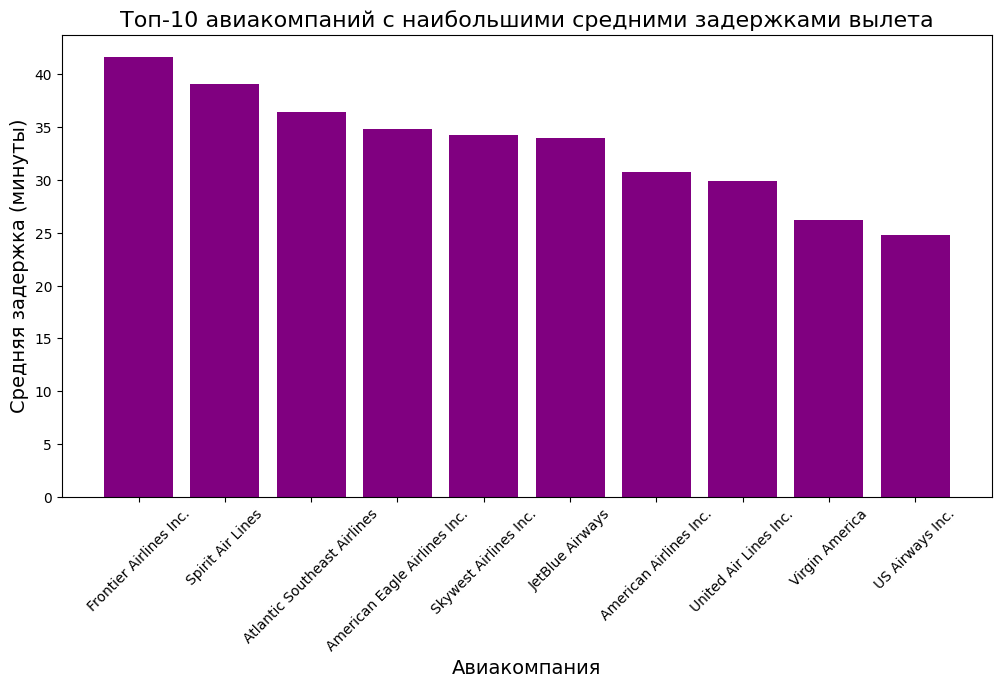

In [12]:
delays_airline = df.groupby('AIRLINE_NAME')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(delays_airline.index, delays_airline.values, color='purple')
plt.title("Топ-10 авиакомпаний с наибольшими средними задержками вылета", fontsize=16)
plt.xlabel("Авиакомпания", fontsize=14)
plt.ylabel("Средняя задержка (минуты)", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Вывод:** Наибольшие задержки наблюдаются у авиакомпаний Frontier Airlines Inc. и Spirit Air Lines. Это может указывать на проблемы в их операционной деятельности.

Рекомендуется провести детальный анализ работы этих авиакомпаний с наибольшими задержками для выявления и устранения причин, а также рассмотреть возможность внедрения лучших практик от более эффективных авиакомпаний.

###**3.**


Сгруппируем данные по причинам задержки

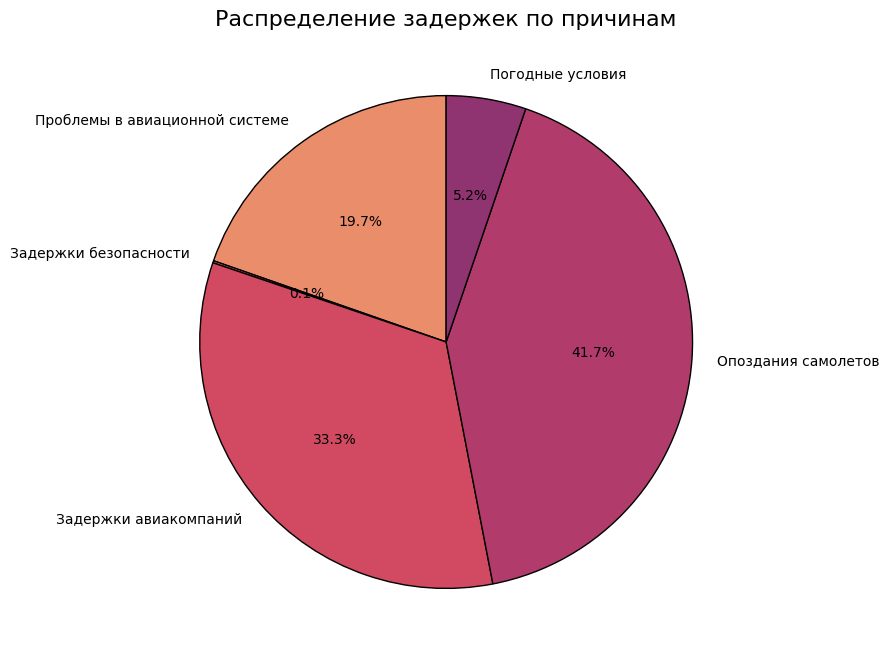

In [13]:
delay_reasons = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()

delay_reasons_out = ['Проблемы в авиационной системе', 'Задержки безопасности', 'Задержки авиакомпаний', 'Опоздания самолетов',
'Погодные условия']

plt.figure(figsize=(8, 8))
plt.pie(
    delay_reasons.values,
    labels=delay_reasons_out,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("flare"),
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title("Распределение задержек по причинам", fontsize=16)
plt.show()

**Вывод:** Главные причины - опоздания самолетов и задержки авиакомпаний. Рекомендуется уделить особое внимание оптимизации процессов авиакомпаний и улучшению планирования, чтобы снизить задержки, вызванные проблемами авиакомпаний и опозданиями самолетов.


###**4.**

Сгруппируем данные по аэропортам.

In [14]:
df = df.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left')

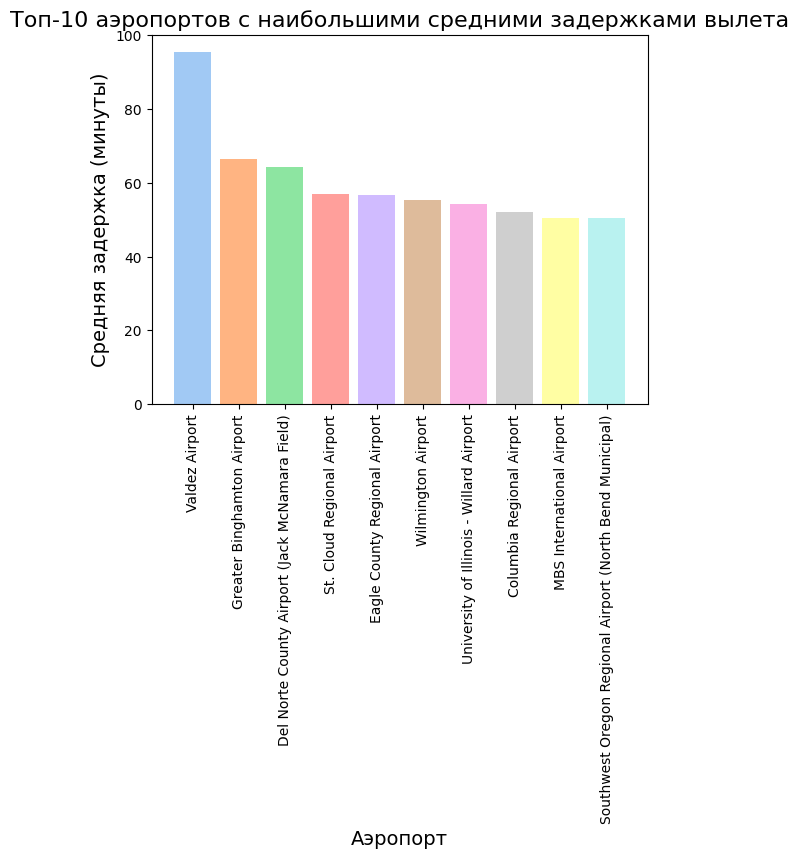

In [16]:
delays_airport = df.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(delays_airport.index, delays_airport.values, color=sns.color_palette("pastel"))
plt.title("Топ-10 аэропортов с наибольшими средними задержками вылета", fontsize=16)
plt.xlabel("Аэропорт", fontsize=14)
plt.ylabel("Средняя задержка (минуты)", fontsize=14)
plt.xticks(rotation=90)
plt.show()

**Вывод:** Видим, что самые большие задержки происходят в аэропорту **Valdez Airport**. Рекомендуется провести детальный анализ работы этого аэропорта для выявления и устранения причин задержек.

###**5.**



Сгруппируем данные по времени отправления.

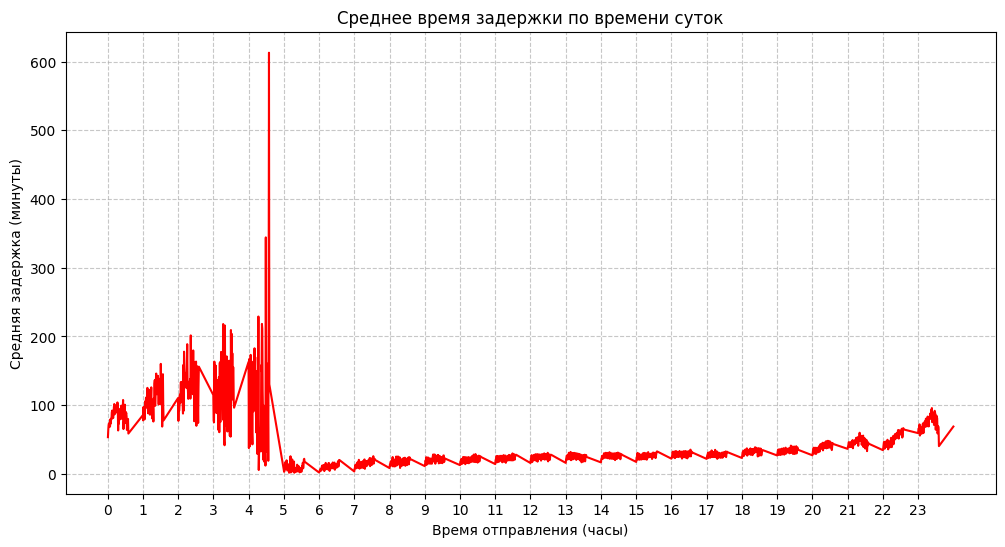

In [17]:
delay_time = df.groupby("DEPARTURE_TIME")["DEPARTURE_DELAY"].mean()

plt.figure(figsize=(12, 6))
plt.plot(delay_time.index / 100, delay_time.values,  linestyle='-', color='red')
plt.xlabel("Время отправления (часы)")
plt.ylabel("Средняя задержка (минуты)")
plt.title("Среднее время задержки по времени суток")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])
plt.show()

**Вывод:** Видим, что задержки становятся дольше в ночное время суток. Так может происходить из-за того, что количество работников аэропорта в ночное время может быть сокращено. Также в ночное время суток погодные причины могут сильнее влиять на время задержки.